# Proyecto de predicción de energia renovable Global

Este conjunto de datos muestra los indicadores de energia renovable en todos los paises desde el año 2000 hasta el 2020. Contiene las siguientes caracteristicas:

- **Entity**: El nombre del país o región para el cual se reportan los datos.
- **Year**: El año para el cual se reportan los datos, que va desde 2000 hasta 2020.
- **Access to electricity (% of population)**: El porcentaje de población con acceso a electricidad.
- **Access to clean fuels for cooking (% of population)**: El porcentaje de la población que depende principalmente de combustibles limpios.
- **Renewable-electricity-generating-capacity-per-capita**: Capacidad instalada de energía renovable por persona.
- **Financial flows to developing countries (US $)**: Ayuda y asistencia de países desarrollados para proyectos de energía limpia.
- **Renewable energy share in total final energy consumption (%)**: Porcentaje de energía renovable en el consumo final total de energía.
- **Electricity from fossil fuels (TWh)**: Electricidad generada a partir de combustibles fósiles (carbón, petróleo, gas) en teravatios-hora.
- **Electricity from nuclear (TWh)**: Electricidad generada a partir de energía nuclear en teravatios-hora.
- **Electricity from renewables (TWh)**: Electricidad generada a partir de fuentes renovables (hidroeléctrica, solar, eólica, etc.) en teravatios-hora.
- **Low-carbon electricity (% electricity)**: Porcentaje de electricidad de fuentes bajas en carbono (nuclear y renovables).
- **Primary energy consumption per capita (kWh/person)**: Consumo de energía por persona en kilovatios-hora.
- **Energy intensity level of primary energy (MJ/$2011 PPP GDP)**: Uso de energía por unidad de PIB a paridad de poder adquisitivo.
- **Value_co2_emissions (metric tons per capita)**: Emisiones de dióxido de carbono por persona en toneladas métricas.
- **Renewables (% equivalent primary energy)**: Energía primaria equivalente derivada de fuentes renovables.
- **GDP growth (annual %)**: Tasa de crecimiento anual del PIB basada en moneda local constante.
- **GDP per capita**: Producto interno bruto por persona.
- **Density (P/Km2)**: Densidad poblacional en personas por kilómetro cuadrado.
- **Land Area (Km2)**: Área total de tierra en kilómetros cuadrados.
- **Latitude**: Latitud del centroide del país en grados decimales.
- **Longitude**: Longitud del centroide del país en grados decimales.

Variable objetivo:
**Electricity from renewables (TWh)**


## Librerias utilizadas


In [1]:
# preprocesamiento de datos y graficos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creacion del modelo, metricas y procesamiento de los datos
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

## Importar conjunto de datos


In [2]:
# Importar conjunto de datos
df = pd.read_csv("global-data-on-sustainable-energy (1).csv")
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [3]:
rows, columns = df.shape
print(f"El dataset tiene {rows} filas y {columns} columnas.")

El dataset tiene 3649 filas y 21 columnas.


## Estadística descriptiva


In [4]:
# Mostrar informacion general del conjunto de datos (tipo, cantidad)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [5]:
# Estadisticas descriptivas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,3649.0,2.010038e+03,6.054228e+00,2000.000000,2005.000000,2.010000e+03,2.015000e+03,2.020000e+03
Access to electricity (% of population),3639.0,7.893370e+01,3.027554e+01,1.252269,59.800890,9.836157e+01,1.000000e+02,1.000000e+02
Access to clean fuels for cooking,3480.0,6.325529e+01,3.904366e+01,0.000000,23.175000,8.315000e+01,1.000000e+02,1.000000e+02
Renewable-electricity-generating-capacity-per-capita,2718.0,1.131375e+02,2.441673e+02,0.000000,3.540000,3.291000e+01,1.122100e+02,3.060190e+03
Financial flows to developing countries (US $),1560.0,9.422400e+07,2.981544e+08,0.000000,260000.000000,5.665000e+06,5.534750e+07,5.202310e+09
Renewable energy share in the total final energy consumption (%),3455.0,3.263816e+01,2.989490e+01,0.000000,6.515000,2.330000e+01,5.524500e+01,9.604000e+01
Electricity from fossil fuels (TWh),3628.0,7.036500e+01,3.480519e+02,0.000000,0.290000,2.970000e+00,2.683750e+01,5.184130e+03
Electricity from nuclear (TWh),3523.0,1.345019e+01,7.300662e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,8.094100e+02
Electricity from renewables (TWh),3628.0,2.396801e+01,1.044311e+02,0.000000,0.040000,1.470000e+00,9.600000e+00,2.184940e+03
Low-carbon electricity (% electricity),3607.0,3.680118e+01,3.431488e+01,0.000000,2.877847,2.786507e+01,6.440379e+01,1.000000e+02


In [6]:
# Validar si existen datos nulos
df.isna().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

In [7]:
# Comprobamos el porcentaje de datos nulos en cada columna
nan_percentage = df.isna().sum() / len(df) * 100
print(round(nan_percentage, 2))

Entity                                                               0.00
Year                                                                 0.00
Access to electricity (% of population)                              0.27
Access to clean fuels for cooking                                    4.63
Renewable-electricity-generating-capacity-per-capita                25.51
Financial flows to developing countries (US $)                      57.25
Renewable energy share in the total final energy consumption (%)     5.32
Electricity from fossil fuels (TWh)                                  0.58
Electricity from nuclear (TWh)                                       3.45
Electricity from renewables (TWh)                                    0.58
Low-carbon electricity (% electricity)                               1.15
Primary energy consumption per capita (kWh/person)                   0.00
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          5.67
Value_co2_emissions_kt_by_country     

La columnas "Financial flows to developing countries", "Renewables (% equivalent primary energy)" tienen mas del 50% de datos nulos, las excluimos del dataset


In [8]:
df_2 = df.copy()
# eliminar columnas innecesarias para el modelo ademas de las que tienen mas del 50% de datos nulos
df_2 = df_2.drop(
    columns=[
        "Financial flows to developing countries (US $)",
        "Renewables (% equivalent primary energy)",
    ]
)
# renombrar columnas a una representacion mas simple
df_2 = df_2.rename(
    columns={
        "Density\\n(P/Km2)": "Density (P/Km2)",
        "Access to electricity (% of population)": "Access to electricity",
        "Access to clean fuels for cooking (% of population)": "Access to clean fuels for cooking",
        "Primary energy consumption per capita (kWh/person)": "Primary energy consumption per capita",
        "Energy intensity level of primary energy (MJ/$2017 PPP GDP)": "Energy intensity level of primary energy",
        "GDP growth (annual %)": "GDP growth",
        "Value_co2_emissions (metric tons per capita)": "Value_co2_emissions",
    }
)

In [9]:
# convertir la columna de densidad a numerico
df_2["Density (P/Km2)"] = pd.to_numeric(df_2["Density (P/Km2)"], errors="coerce")

In [10]:
# Comprobamos que se hayan hecho los cambios
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 19 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity                                             3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 6   Electricity from fossil fuels (TWh)                               3628 non-null   float64
 7   Electricity from nuclear (TWh)   

In [11]:
# Calculamos la matriz de correlacion
matrix_correlation = df_2.corr(numeric_only=True)

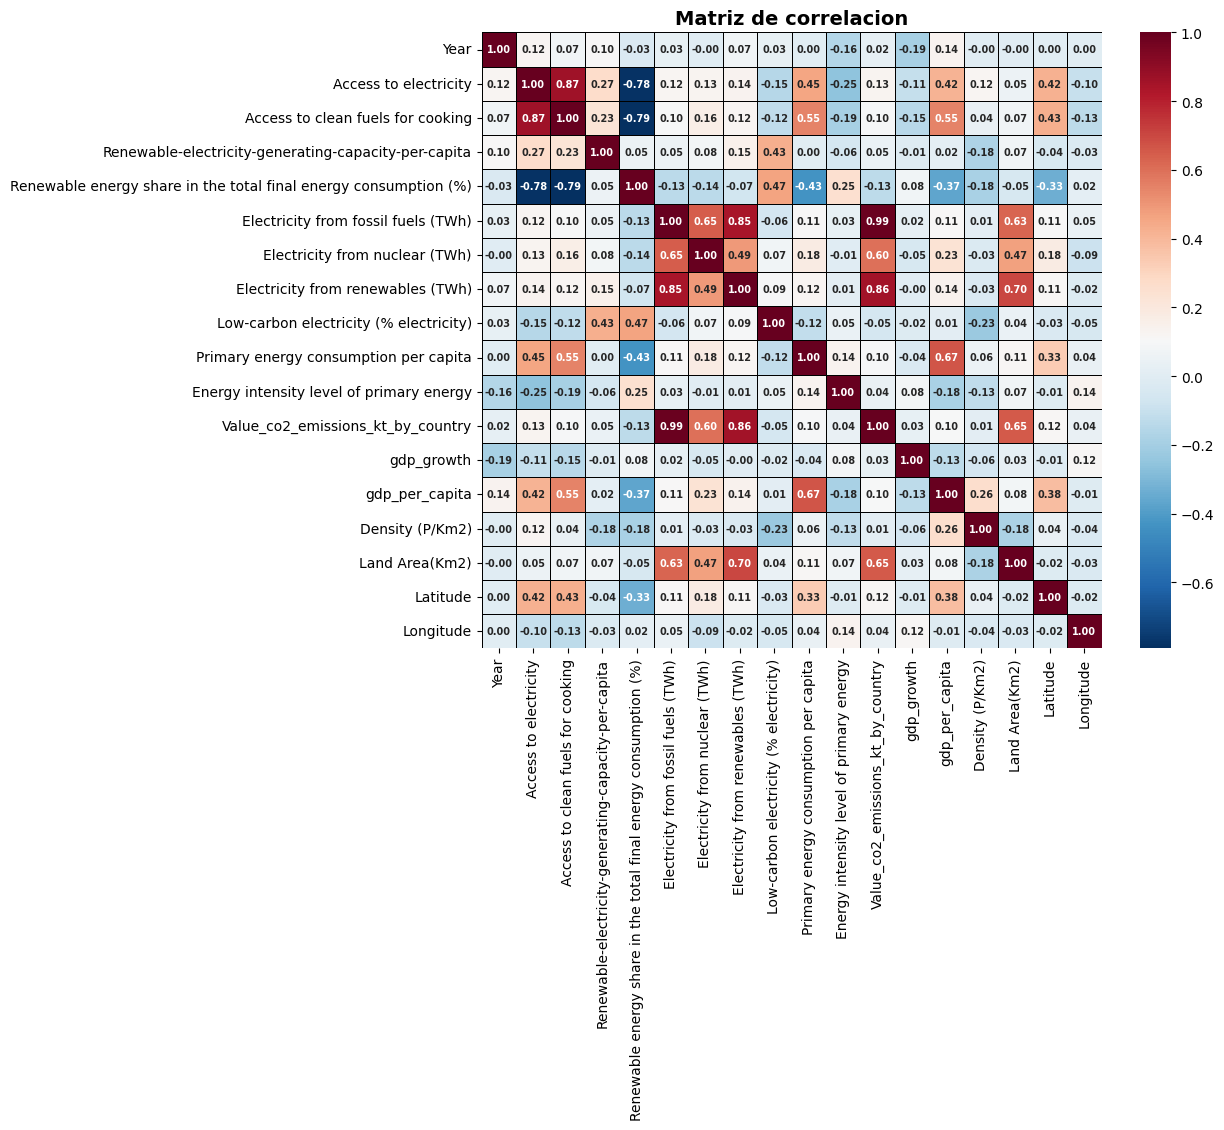

In [12]:
# Grafico de la matriz de correlacion
plt.figure(figsize=(10, 8))
plt.title("Matriz de correlacion", fontsize=14, fontweight="bold")
sns.heatmap(
    matrix_correlation,
    annot=True,
    cmap="RdBu_r",
    fmt=".2f",
    linewidths=0.5,
    linecolor="black",
    annot_kws={"size": 7, "weight": "bold"},
)
plt.show()

### Imputación de valores nulos


In [13]:
df_filled = df_2.copy()
df_filled.head()

,Entity,Year,Access to electricity,Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita,Energy intensity level of primary energy,Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


In [14]:
df_filled.isna().sum()

Entity                                                                0
Year                                                                  0
Access to electricity                                                10
Access to clean fuels for cooking                                   169
Renewable-electricity-generating-capacity-per-capita                931
Renewable energy share in the total final energy consumption (%)    194
Electricity from fossil fuels (TWh)                                  21
Electricity from nuclear (TWh)                                      126
Electricity from renewables (TWh)                                    21
Low-carbon electricity (% electricity)                               42
Primary energy consumption per capita                                 0
Energy intensity level of primary energy                            207
Value_co2_emissions_kt_by_country                                   428
gdp_growth                                                      

In [15]:
"""
mean columns --> columnas con valores nulos que se van a reemplazar por la media
zero columns --> columnas con valores nulos que se van a reemplazar por 0

Esto se hace con el fin de que los datos sean persistentes y logicos para el modelo.
Ej: si existe un valor nulo en la columna "Electricity from nuclear (TWh)" quiere decir que el pais no cuenta con plantas nucleares, por lo tanto no genera energia nuclear.
"""
mean_columns = [
    "Access to electricity",
    "Access to clean fuels for cooking",
    "Primary energy consumption per capita",
    "Energy intensity level of primary energy",
    "gdp_growth",
    "gdp_per_capita",
    "Density (P/Km2)",
    "Land Area(Km2)",
    "Latitude",
    "Longitude",
]
zero_columns = [
    "Electricity from fossil fuels (TWh)",
    "Electricity from nuclear (TWh)",
    "Electricity from renewables (TWh)",
    "Renewable energy share in the total final energy consumption (%)",
    "Low-carbon electricity (% electricity)",
    "Renewables (% equivalent primary energy)",
    "Value_co2_emissions_kt_by_country",
    "Renewable-electricity-generating-capacity-per-capita",
]

# Filtramos los valores por paises, cada grupo sera un pais, luego hallamos la media
# de ese grupo y reemplazamos los valores nulos por esa media.
df_filled = (
    df_filled.groupby("Entity")
    .transform(lambda x: x.fillna(x.mean()))
    .combine_first(df_filled)
)
# por cada columna de mean_columns reemplazamos los valores nulos por la media
for col in mean_columns:
    if col in df_filled.columns:
        df_filled[col] = df_filled[col].fillna(df_filled[col].mean())

# por cada columna de zero_columns reemplazamos los valores nulos por 0
for col in zero_columns:
    if col in df_filled.columns:
        df_filled[col] = df_filled[col].fillna(0)

In [16]:
# Verificamos que no existan mas datos nulos
df_filled.isna().sum()

Access to clean fuels for cooking                                   0
Access to electricity                                               0
Density (P/Km2)                                                     0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Energy intensity level of primary energy                            0
Entity                                                              0
Land Area(Km2)                                                      0
Latitude                                                            0
Longitude                                                           0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita                               0
Renewable energy share in the total final energy consumption (%)    0
Renewable-electricit

In [17]:
# Reordenamos las columnas
df_filled = df_filled[df_2.columns]

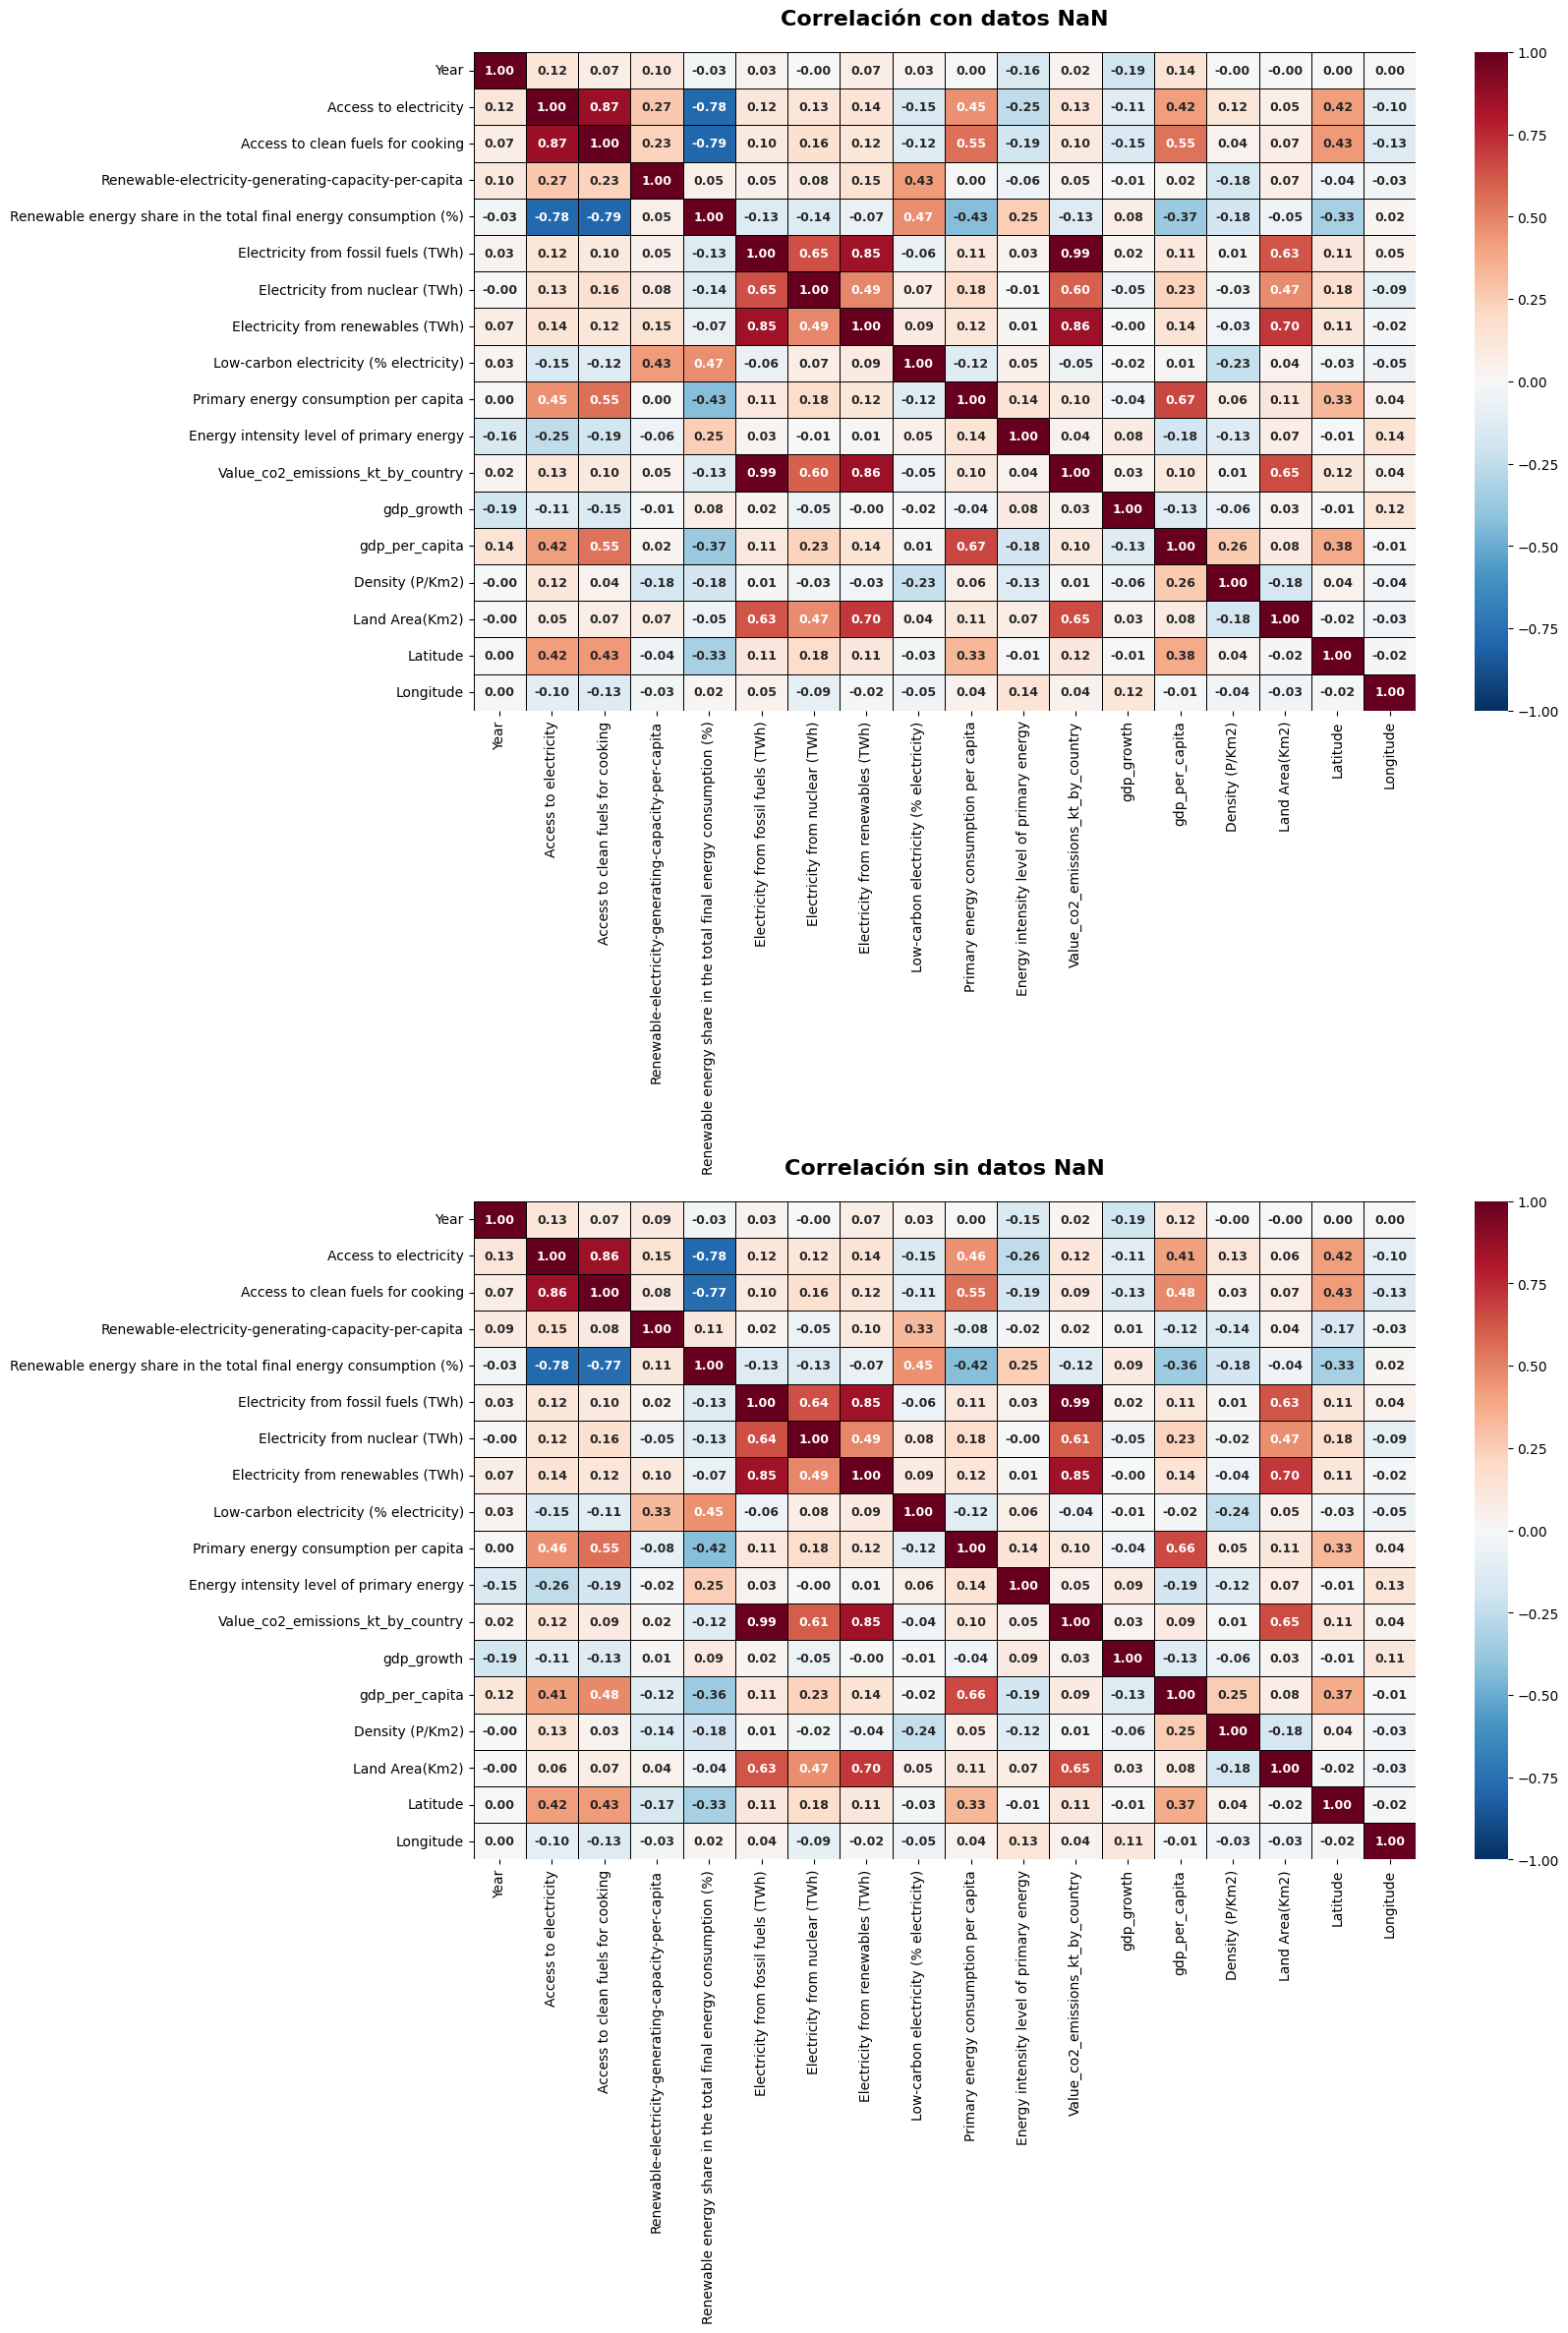

In [18]:
# Hallamos la matriz de correlacion con los nuevos datos y hacemos una comparacion de las 2 correlaciones
matrix_correlation_2 = df_filled.corr(numeric_only=True)
figure, axis = plt.subplots(2, 1, figsize=(17, 25))

sns.heatmap(
    matrix_correlation,
    annot=True,
    cmap="RdBu_r",
    fmt=".2f",
    linewidths=0.5,
    linecolor="black",
    ax=axis[0],
    center=0,
    vmin=-1,
    vmax=1,
    annot_kws={"size": 9, "weight": "bold"},
)
axis[0].set_title("Correlación con datos NaN", fontsize=16, fontweight="bold", pad=20)


sns.heatmap(
    matrix_correlation_2,
    annot=True,
    cmap="RdBu_r",
    fmt=".2f",
    linewidths=0.5,
    linecolor="black",
    ax=axis[1],
    center=0,
    vmin=-1,
    vmax=1,
    annot_kws={"size": 9, "weight": "bold"},
)
axis[1].set_title("Correlación sin datos NaN", fontsize=16, fontweight="bold", pad=20)

plt.tight_layout()
plt.subplots_adjust(wspace=0.3, top=0.93)
plt.show()

## TODO:

1. Graficos de la evolucion de la energia renovable en el tiempo - COMPLETADO
2. Histogramas, Diagramas de caja - Histplot ya hecho.
3. Graficos de la evolucion de la energia renovable en el tiempo por pais - COMPLETADO
4. Graficos de distribuciones de los datos (Año, acceso electricidad, energia per capita) - COMPLETADO
5. Analisis de cada grafico -
6. Crear un modelo de regresion lineal - COMPLETADO
7. Hacer una prediccion de la energia renovable en el futuro - COMPLETAR
8. Analisis de los resultados
9. Metrica de evaluacion del modelo - COMPLETADO
10. Conclusiones


## Evolucion de energia renovable con el tiempo


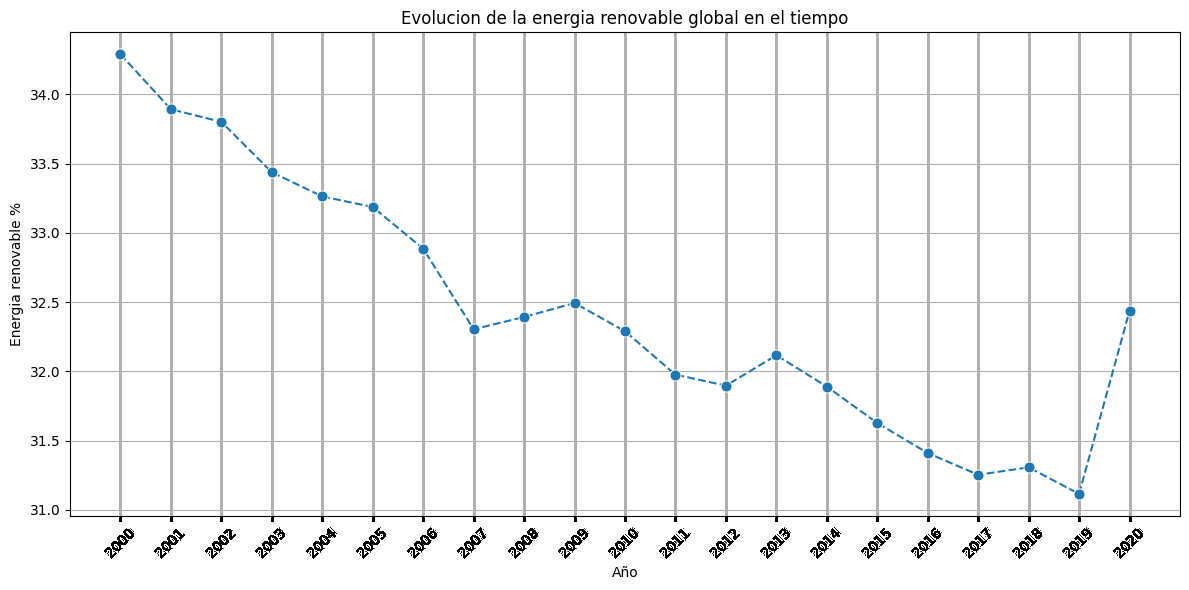

In [19]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_filled.groupby("Year")[
        "Renewable energy share in the total final energy consumption (%)"
    ]
    .mean()
    .reset_index(),
    x="Year",
    y="Renewable energy share in the total final energy consumption (%)",
    marker="o",
    markersize=8,
    linestyle="--",
)
plt.title("Evolucion de la energia renovable global en el tiempo")
plt.xlabel("Año")
plt.ylabel("Energia renovable %")
plt.xticks(df_filled["Year"].astype(int), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

El grafico nos dice cual es el promedio de consumo de energias renovables que se gastan, en el consumo final de la energia en general.
Esta organizado por promedio global


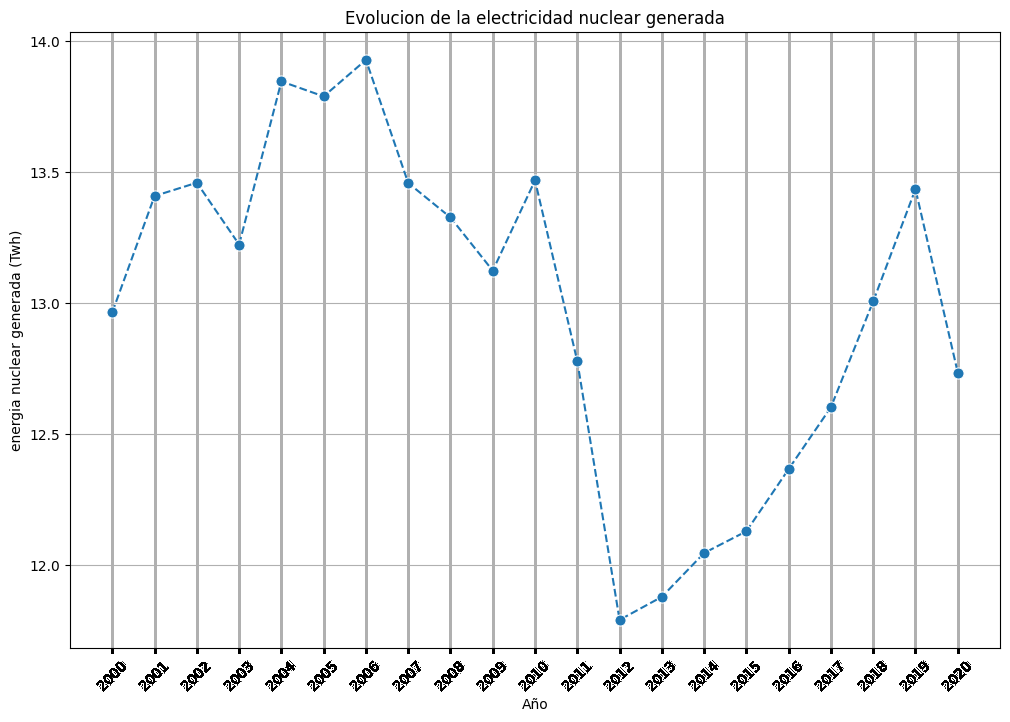

In [20]:
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=df_filled.groupby("Year")["Electricity from nuclear (TWh)"]
    .mean()
    .reset_index(),
    x="Year",
    y="Electricity from nuclear (TWh)",
    marker="o",
    markersize=8,
    linestyle="--",
)
plt.title("Evolucion de la electricidad nuclear generada")
plt.xlabel("Año")
plt.ylabel("energia nuclear generada (Twh)")
plt.xticks(df_filled["Year"], rotation=45)
plt.grid(True)
plt.show()

Grafica el promedio global de cantidad de electricidad nuclear generada a traves de los años


In [21]:
electricity_renewable_by_year = (
    df_filled.groupby("Year")["Electricity from renewables (TWh)"].mean().reset_index()
)
electricity_renewable_by_year

,Year,Electricity from renewables (TWh)
0,2000,14.796301
1,2001,14.460581
2,2002,14.935465
3,2003,15.091977
4,2004,16.248953
5,2005,17.026279
6,2006,17.838314
7,2007,18.271782
8,2008,19.834943
9,2009,20.270402


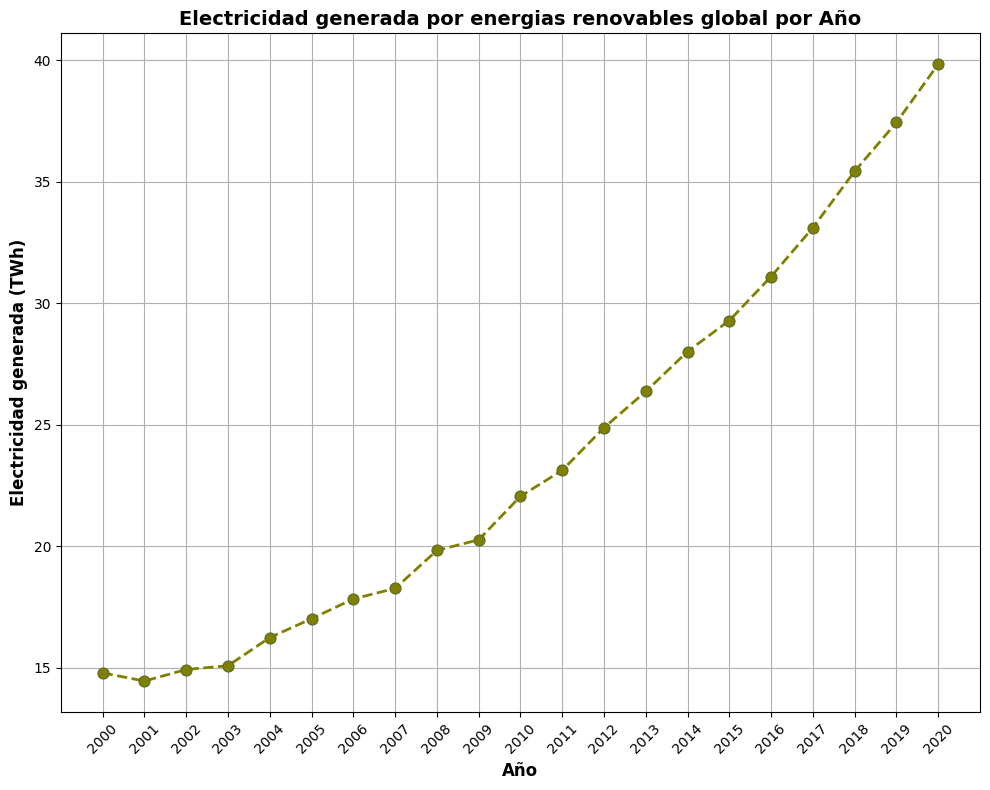

In [22]:
plt.figure(figsize=(10, 8))
sns.lineplot(
    data=electricity_renewable_by_year,
    x="Year",
    y="Electricity from renewables (TWh)",
    marker="o",
    markersize=8,
    linestyle="--",
    lw=2,
    c="olive",
    mec="darkolivegreen",
)
plt.title(
    "Electricidad generada por energias renovables global por Año",
    fontsize=14,
    fontweight="bold",
)
plt.xlabel("Año", fontsize=12, fontweight="bold")
plt.ylabel("Electricidad generada (TWh)", fontsize=12, fontweight="bold")
plt.xticks(electricity_renewable_by_year["Year"], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
# Promedio de electricidad renovable para los 15 paises con mas generacion
electricity_by_country = (
    df_filled.groupby(["Entity"])[["Electricity from renewables (TWh)"]]
    .mean()
    .reset_index()
    .sort_values("Electricity from renewables (TWh)", ascending=False)
    .head(15)
)
electricity_by_country


,Entity,Electricity from renewables (TWh)
34,China,938.235238
169,United States,487.338095
23,Brazil,405.307619
29,Canada,388.912381
74,India,164.921905
119,Norway,132.163333
81,Japan,129.698571
62,Germany,125.419048
154,Sweden,84.633333
57,France,81.340476


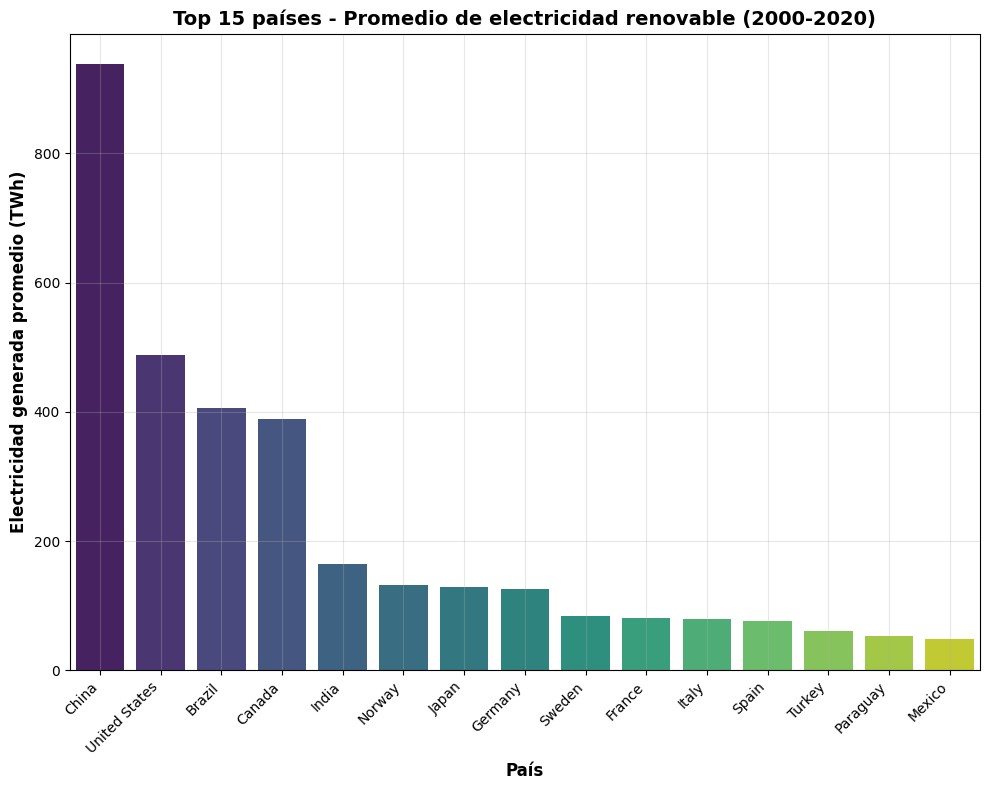

In [24]:
plt.figure(figsize=(10, 8))
sns.barplot(
    data=electricity_by_country,
    x="Entity",
    y="Electricity from renewables (TWh)",
    palette="viridis",
    hue="Entity",
)
plt.title(
    "Top 15 países - Promedio de electricidad renovable (2000-2020)",
    fontsize=14,
    fontweight="bold",
)
plt.xlabel("País", fontsize=12, fontweight="bold")
plt.ylabel("Electricidad generada promedio (TWh)", fontsize=12, fontweight="bold")
plt.xticks(rotation=45, ha="right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [25]:
# Evolución temporal de los principales países generadores de energía renovable
top_countries = electricity_by_country.head(10)["Entity"].tolist()
data_top_countries = df_filled[df_filled["Entity"].isin(top_countries)]

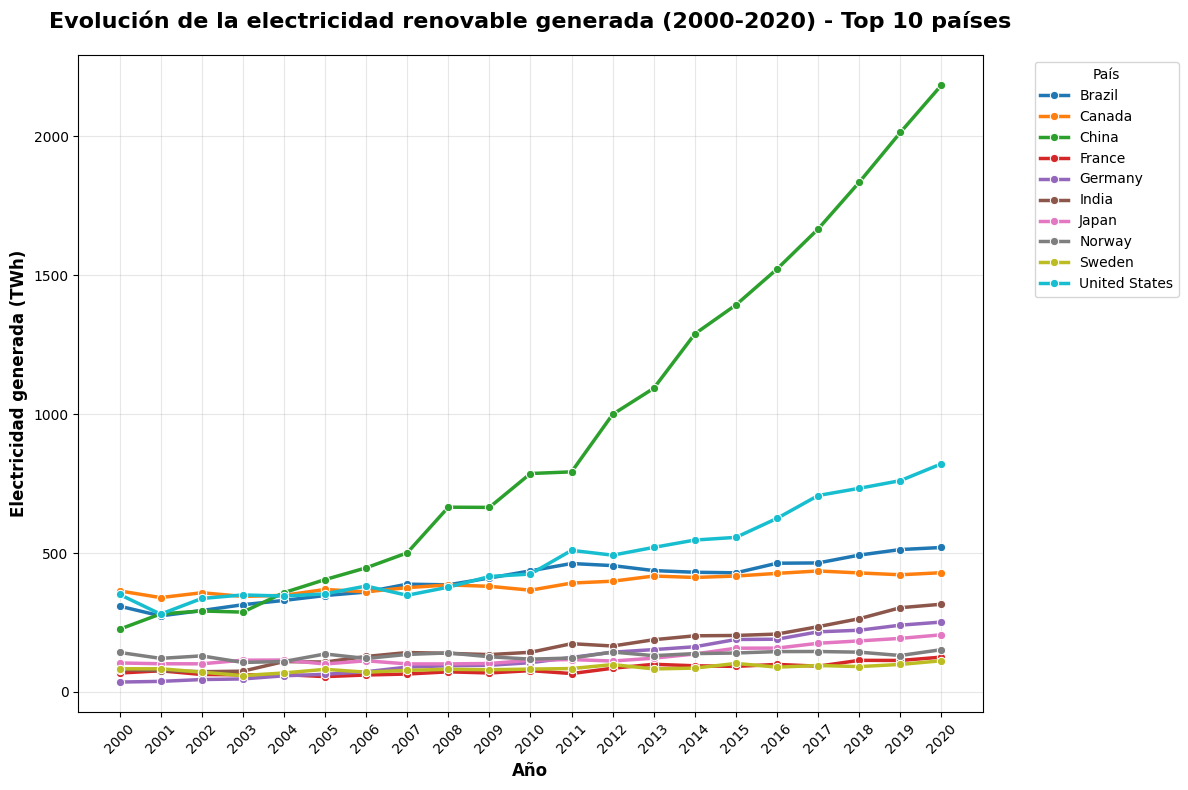

In [26]:
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=data_top_countries,
    x="Year",
    y="Electricity from renewables (TWh)",
    hue="Entity",
    marker="o",
    markersize=6,
    linewidth=2.5,
)
plt.title(
    "Evolución de la electricidad renovable generada (2000-2020) - Top 10 países",
    fontsize=16,
    fontweight="bold",
    pad=20,
)
plt.xlabel("Año", fontsize=12, fontweight="bold")
plt.ylabel("Electricidad generada (TWh)", fontsize=12, fontweight="bold")
plt.xticks(data_top_countries["Year"].unique(), rotation=45)
plt.legend(title="País", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

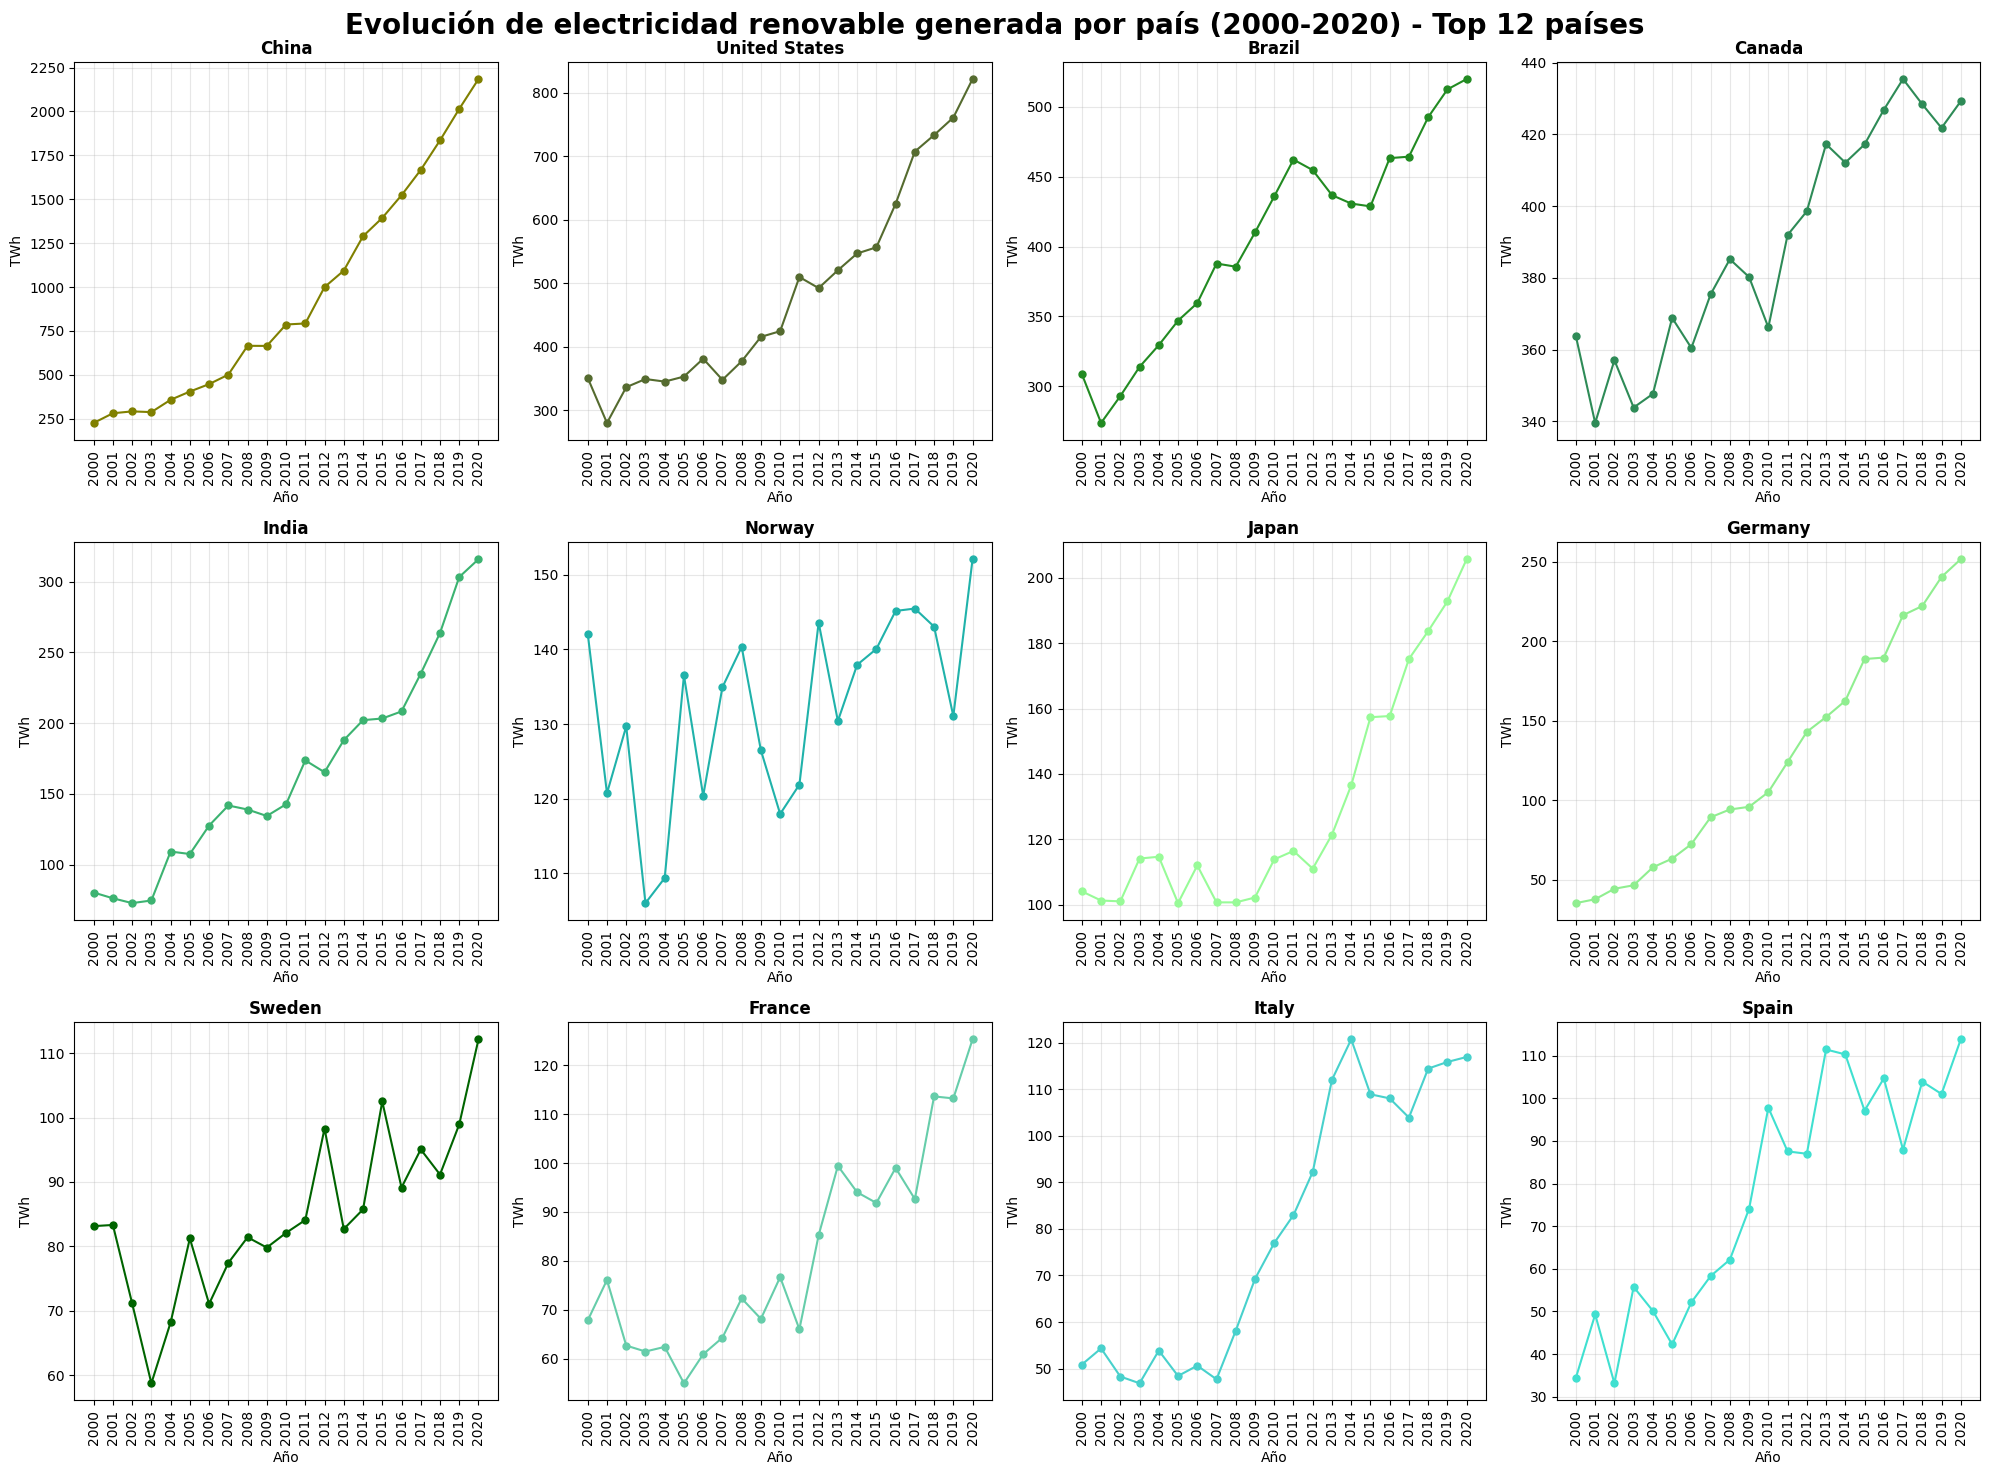

In [27]:
# Evolución individual por país (Top 12)
top_12_countries = electricity_by_country.head(12)["Entity"].tolist()
data_facet = df_filled[df_filled["Entity"].isin(top_12_countries)]

# Crear subgráficos
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle(
    "Evolución de electricidad renovable generada por país (2000-2020) - Top 12 países",
    fontsize=20,
    fontweight="bold",
)

for i, country in enumerate(top_12_countries):
    row = i // 4
    col = i % 4

    country_data = data_facet[data_facet["Entity"] == country]
    color = [
        "olive",
        "darkolivegreen",
        "forestgreen",
        "seagreen",
        "mediumseagreen",
        "lightseagreen",
        "palegreen",
        "lightgreen",
        "darkgreen",
        "mediumaquamarine",
        "mediumturquoise",
        "turquoise",
    ]

    axes[row, col].plot(
        country_data["Year"],
        country_data["Electricity from renewables (TWh)"],
        marker="o",
        linewidth=1.5,
        markersize=5,
        color=color[i],
    )
    axes[row, col].set_title(country, fontsize=12, fontweight="bold")
    axes[row, col].set_xlabel("Año", fontsize=10)
    axes[row, col].set_ylabel("TWh", fontsize=10)
    axes[row, col].grid(True, alpha=0.3)
    axes[row, col].set_xticks(country_data["Year"])
    axes[row, col].tick_params(axis="x", rotation=90)


plt.tight_layout()
plt.show()


Países encontrados en el dataset: ['Colombia', 'Peru', 'Brazil', 'Nicaragua', 'Mexico', 'Argentina', 'Ecuador', 'Chile', 'Uruguay', 'Paraguay']
Países no encontrados: set()


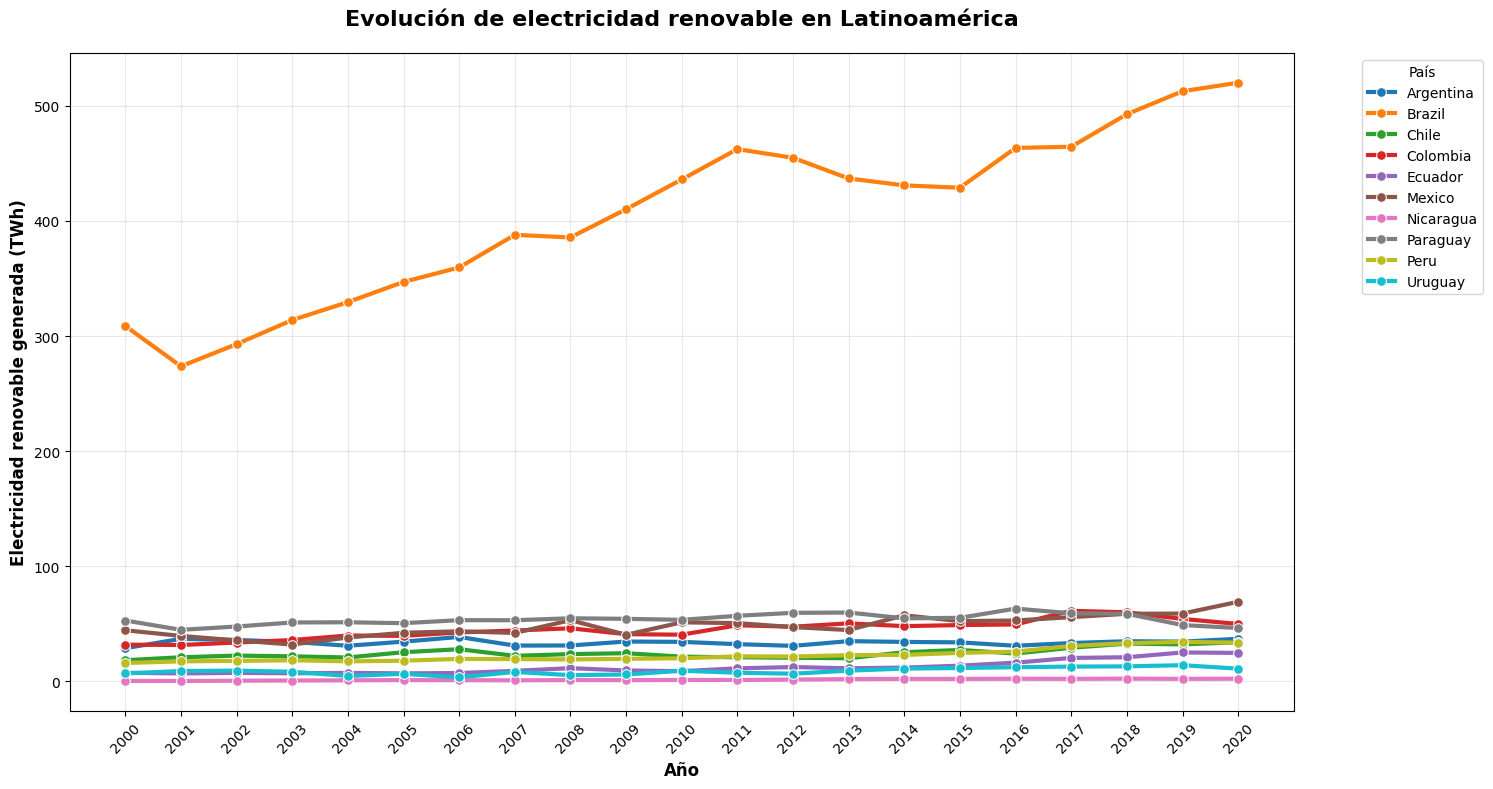

In [28]:
# Paises Latinoamericanos
country_of_interest = [
    "Colombia",
    "Peru",
    "Brazil",
    "Nicaragua",
    "Mexico",
    "Argentina",
    "Ecuador",
    "Chile",
    "Uruguay",
    "Paraguay",
]

# Filtrar datos solo para países de interés que existan en el dataset
countrys_available = df_filled["Entity"].unique()
countrys_filtered = [
    country for country in country_of_interest if country in countrys_available
]

print(f"Países encontrados en el dataset: {countrys_filtered}")
print(f"Países no encontrados: {set(country_of_interest) - set(countrys_filtered)}")

countrys_of_interest_data = df_filled[df_filled["Entity"].isin(countrys_filtered)]

if not countrys_of_interest_data.empty:
    plt.figure(figsize=(15, 8))
    sns.lineplot(
        data=countrys_of_interest_data,
        x="Year",
        y="Electricity from renewables (TWh)",
        hue="Entity",
        marker="o",
        markersize=7,
        linewidth=3,
    )
    plt.title(
        "Evolución de electricidad renovable en Latinoamérica",
        fontsize=16,
        fontweight="bold",
        pad=20,
    )
    plt.xlabel("Año", fontsize=12, fontweight="bold")
    plt.ylabel("Electricidad renovable generada (TWh)", fontsize=12, fontweight="bold")
    plt.xticks(countrys_of_interest_data["Year"].unique(), rotation=45)
    plt.legend(title="País", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron datos para los países especificados")


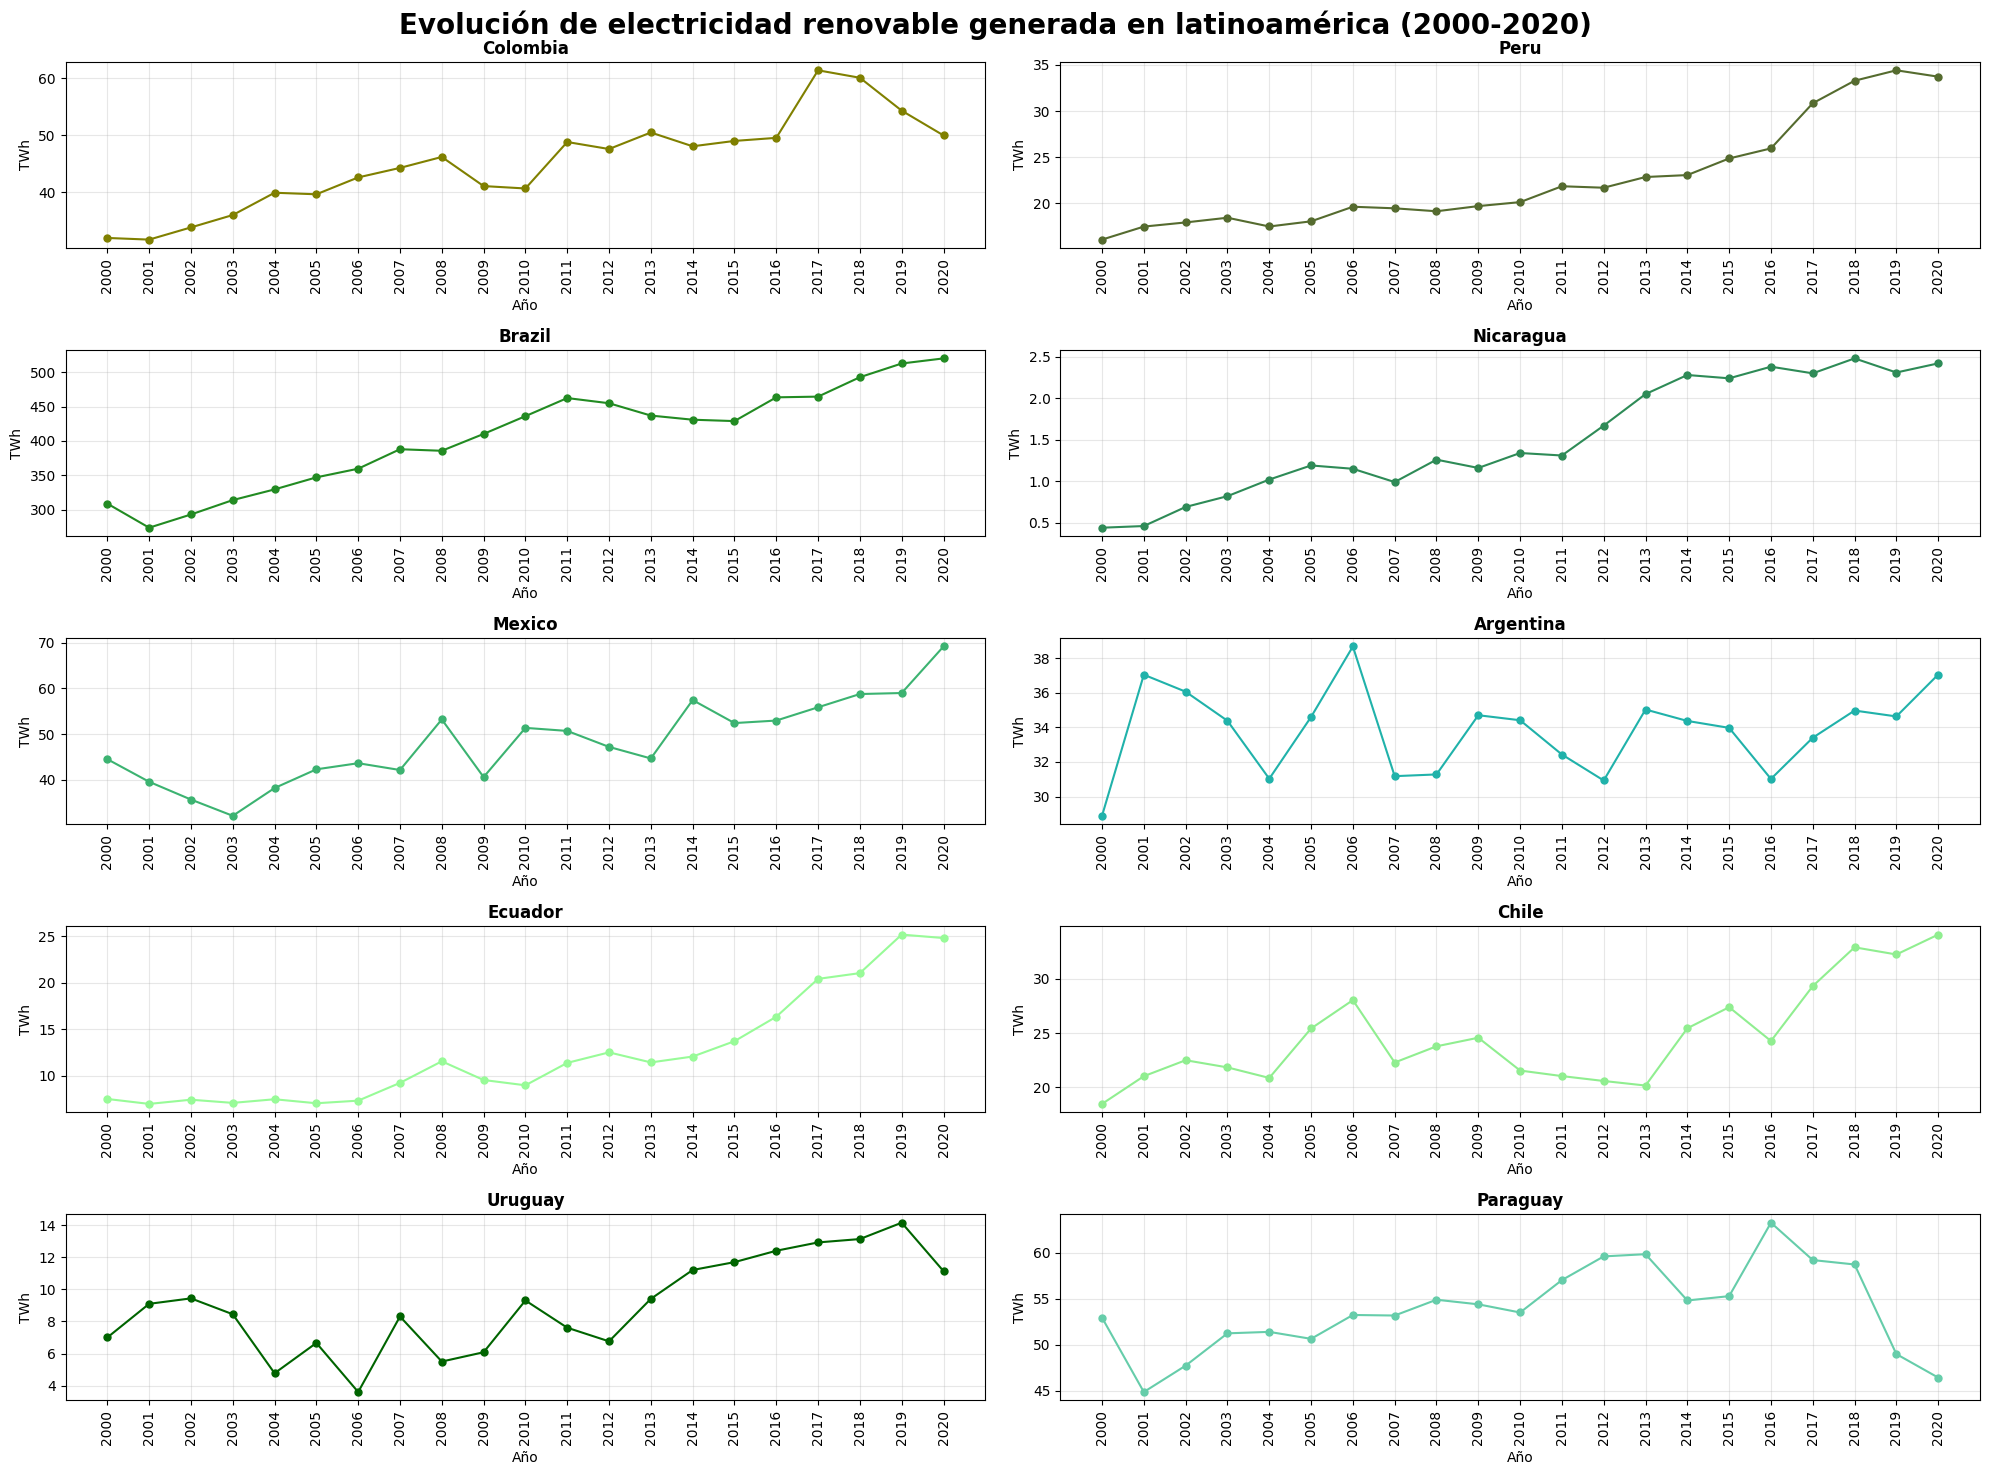

In [29]:
fig, axes = plt.subplots(5, 2, figsize=(20, 15))
fig.suptitle(
    "Evolución de electricidad renovable generada en latinoamérica (2000-2020)",
    fontsize=20,
    fontweight="bold",
)

for i, country in enumerate(countrys_filtered):
    row = i // 2
    col = i % 2

    country_data = countrys_of_interest_data[
        countrys_of_interest_data["Entity"] == country
    ]
    color = [
        "olive",
        "darkolivegreen",
        "forestgreen",
        "seagreen",
        "mediumseagreen",
        "lightseagreen",
        "palegreen",
        "lightgreen",
        "darkgreen",
        "mediumaquamarine",
        "mediumturquoise",
        "turquoise",
    ]

    axes[row, col].plot(
        country_data["Year"],
        country_data["Electricity from renewables (TWh)"],
        marker="o",
        linewidth=1.5,
        markersize=5,
        color=color[i],
    )
    axes[row, col].set_title(country, fontsize=12, fontweight="bold")
    axes[row, col].set_xlabel("Año", fontsize=10)
    axes[row, col].set_ylabel("TWh", fontsize=10)
    axes[row, col].grid(True, alpha=0.3)
    axes[row, col].set_xticks(country_data["Year"])
    axes[row, col].tick_params(axis="x", rotation=90)


plt.tight_layout()
plt.show()

## Modelo de regresion lineal con Scikit-learn


In [ ]:
# Separamos la columna target del dataset filtrado
dataset = df_filled.drop(columns=["Electricity from renewables (TWh)"])
target = df_filled["Electricity from renewables (TWh)"]

# merge a los 2 dataframes para que la columna target este al final del dataset para una mejor manipulacion
merged_data = dataset.merge(target, left_index=True, right_index=True)

In [44]:
merged_data.head()

,Entity,Year,Access to electricity,Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita,Energy intensity level of primary energy,Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude,Electricity from renewables (TWh)
0,Afghanistan,2000,1.613591,6.2,9.22,44.99,0.16,0.0,65.957440,302.59482,1.64,760.000000,6.163893,439.055765,60.0,652230.0,33.93911,67.709953,0.31
1,Afghanistan,2001,4.074574,7.2,8.86,45.60,0.09,0.0,84.745766,236.89185,1.74,730.000000,6.163893,439.055765,60.0,652230.0,33.93911,67.709953,0.50
2,Afghanistan,2002,9.409158,8.2,8.47,37.83,0.13,0.0,81.159424,210.86215,1.40,1029.999971,6.163893,179.426579,60.0,652230.0,33.93911,67.709953,0.56
3,Afghanistan,2003,14.738506,9.5,8.09,36.66,0.31,0.0,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953,0.63
4,Afghanistan,2004,20.064968,10.9,7.75,44.24,0.33,0.0,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953,0.56


### separamos las variables independientes y dependiente


In [32]:
# Separar las variables independientes y dependientes
X = merged_data.iloc[:, :-1].values
y = merged_data.iloc[:, -1].values

In [33]:
X

array([['Afghanistan', 2000, 1.613591, ..., 652230.0, 33.93911,
        67.709953],
       ['Afghanistan', 2001, 4.074574, ..., 652230.0, 33.93911,
        67.709953],
       ['Afghanistan', 2002, 9.409158, ..., 652230.0, 33.93911,
        67.709953],
       ...,
       ['Zimbabwe', 2018, 45.572647, ..., 390757.0, -19.015438,
        29.154857],
       ['Zimbabwe', 2019, 46.781475, ..., 390757.0, -19.015438,
        29.154857],
       ['Zimbabwe', 2020, 52.74767, ..., 390757.0, -19.015438, 29.154857]],
      shape=(3649, 18), dtype=object)

In [34]:
# dimensiones del dataset
X.shape, y.shape

((3649, 18), (3649,))

### Aplicamos one hot encoding para la variable categorica "Entity"


In [35]:
ct = ColumnTransformer(
    [("encoder", OneHotEncoder(sparse_output=False), [0])],
    remainder="passthrough",
)
X_encoded = ct.fit_transform(X)
X_encoded[1, 176:]

array([2001, 4.074574, 7.2, 8.86, 45.6, 0.09, 0.0, 84.745766, 236.89185,
       1.74, 730.0, 6.1638933295, 439.0557646526315, 60.0, 652230.0,
       33.93911, 67.709953], dtype=object)

### Separacion de datos de entrenamiento y prueba. Relacion 80% entrenamiento y 20% prueba


In [36]:
# Separar el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

In [45]:
X_train.shape

(2919, 193)

### Estandarizar los datos


In [46]:
# Escalar las caracteristicas
sc = StandardScaler()

X_train[:, 176:] = sc.fit_transform(X_train[:, 176:])
X_test[:, 176:] = sc.transform(X_test[:, 176:])

In [47]:
X_train[:, 176:]

array([[1.295284107762402, 0.7041179865222239, 0.9712612071811859, ...,
        -0.39896152300537063, -0.030959820534249633, -1.164661403235826],
       [1.459966119633932, 0.7041179865222239, 0.9712612071811859, ...,
        -0.3986743907198595, -0.6954307172915972, 1.3299004138509998],
       [0.8012380721478128, 0.7041179865222239, 0.9712612071811859, ...,
        -0.3918147688660002, 0.30103212430829074, 0.5417767492486621],
       ...,
       [1.6246481315054617, 0.7041179865222239, 0.8087944130042828, ...,
        -0.32916692158724886, 0.14190402683257974, -1.3892305706103456],
       [-0.8455820465674848, 0.7041179865222239, 0.9712612071811859, ...,
        5.80641269522766, 0.788222441756222, -1.6577241666132772],
       [-0.3515360109528955, 0.5280879842689064, 0.5860576790520771, ...,
        -0.29574598567368965, -0.588853676111856, -1.063514856081579]],
      shape=(2919, 17), dtype=object)

In [48]:
y_train

array([1.0000e-02, 7.8000e-01, 3.0000e-02, ..., 3.1300e+00, 3.5304e+02,
       8.6000e-01], shape=(2919,))

### Aplicar el modelo de regresion lineal, entrenar y crear predicciones


In [49]:
regression = LinearRegression()
model = regression.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
dataframe = pd.DataFrame({"Real": y_test, "Predicted": y_pred})
dataframe

,Actual,Predicted
0,1.31,-1.785698
1,0.00,3.606949
2,5.46,10.716554
3,14.06,21.068368
4,87.53,86.438875
...,...,...
725,3.49,7.926215
726,3.45,-4.725882
727,11.23,21.978375
728,0.01,-0.077083


### Metricas de evaluacion del modelo


In [53]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mse: {mse}")
print(f"R^2: {round(r2 * 100, 4)}")

mse: 382.53201221577035
R^2: 91.2056


In [ ]:
energy_vars = [
    "Renewable energy share in the total final energy consumption (%)",
    "Electricity from renewables (TWh)",
    "Electricity from fossil fuels (TWh)"
]

# Boxplots individuales
for col in energy_vars:
    plt.figure(figsize=(6, 4))
    df_filled.boxplot(column=col)
    plt.title(f"Boxplot de {col}")
    plt.ylabel("Valor")
    plt.show()

In [ ]:
#grafico combinado
plt.figure(figsize=(8, 6))
df_filled[energy_vars].boxplot()
plt.title("Boxplots de variables energéticas (detección de outliers)", fontsize=14)
plt.ylabel("Valores")
plt.xticks(rotation=30)
plt.show()
